<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [109]:
# импортируем необходимые библиотеки,которые пополняются при дальнейшем анализе
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

# вынеси random_state=12345 в глобальную переменную


In [110]:
# открываем таблицу для просмотра, выведем первые 30 строк
data = pd.read_csv('/datasets/Churn.csv')
data.head(30)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [111]:
# отработать замечание feature_importance

#importances = model.feature_importances_
#feature_list = list(train_features.columns)
#feature_results = pd.data({'признак': feature_list,'важность': importances})
#feature_results = feature_results.sort_values('важность',ascending = False).reset_index(drop=True)


In [112]:
# размер таблицы
data.shape

(10000, 14)

In [113]:
# общая инфо
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [114]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


`Таблица имеет 14 столбцов и 10000 строк. Все столбцы имеют необходимый вид данных, менять не нужно. Поменять нужно названия столбцов: привести к нижнему регистру и записать через _.
Целевой признак Exited (факт ухода клиента) для нас является важным признаком, который показывает результат анализа: 1-уйдет, 0- не уйдет. Данный признак приведен к численному типу данных(int). В таблице есть столбцы,которые,по-моему мнению, не стоит оставлять,можно удалить. Например, фамилия клиента, номер в базе данных, айди, зарплата. Если они понадобятся, вернем их. А так же проверим данные на дубликаты и пропуски и, по возможности, избавимся от них.`

In [115]:
# для начала удалим ненужные столбцы методом drop
data = data.drop(['RowNumber','CustomerId', 'EstimatedSalary', 'Surname'], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,0
2,502,France,Female,42,8.0,159660.80,3,1,0,1
3,699,France,Female,39,1.0,0.00,2,0,0,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,0
9997,709,France,Female,36,7.0,0.00,1,0,1,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,1


In [116]:
# теперь переименуем двойные названия и разделим через _
data = data.rename(columns={'CreditScore':'credit_score', 'NumOfProducts': 'num_of_products', 'HasCrCard':'has_cr_card', 'IsActiveMember':'is-active_member'})
data

,credit_score,Geography,Gender,Age,Tenure,Balance,num_of_products,has_cr_card,is-active_member,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,0
2,502,France,Female,42,8.0,159660.80,3,1,0,1
3,699,France,Female,39,1.0,0.00,2,0,0,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,0
9997,709,France,Female,36,7.0,0.00,1,0,1,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,1


In [117]:
# и приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
# проверим результат изменений 
print(data.columns)
data


Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is-active_member', 'exited'],
      dtype='object')


,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is-active_member,exited
0,619,France,Female,42,2.0,0.00,1,1,1,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,0
2,502,France,Female,42,8.0,159660.80,3,1,0,1
3,699,France,Female,39,1.0,0.00,2,0,0,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,0
9997,709,France,Female,36,7.0,0.00,1,0,1,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,1


In [118]:
# проверка на дубликаты
print('Дубликатов оказалось:', data.duplicated().sum())
print(data[data.duplicated()])
print('Удаляем')
data = data.drop_duplicates().reset_index()
print('Дубликатов оказалось:', data.duplicated().sum())

Дубликатов оказалось: 1
      credit_score geography gender  age  tenure  balance  num_of_products  \
8857           624    France   Male   36     6.0      0.0                2   

      has_cr_card  is-active_member  exited  
8857            0                 0       0  
Удаляем
Дубликатов оказалось: 0


In [119]:
# проверка на пропуски
print(data.isna().sum())
# пропуски в столбце tenure заменим на 0
data['tenure'] = data['tenure'].fillna(0)
print('**************')
print(data.isna().sum())

index                 0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is-active_member      0
exited                0
dtype: int64
**************
index               0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is-active_member    0
exited              0
dtype: int64


Получаем таблицу с такими данными:

- credit_score — кредитный рейтинг
- geography — страна проживания
- gender — пол
- age — возраст
- tenure — сколько лет человек является клиентом банка
- balance — баланс на счёте
- num_of_products — количество продуктов банка, используемых клиентом
- has_cr_card — наличие кредитной карты
- is_active_member — активность клиента

Целевой признак
- exited — факт ухода клиента


## Исследование задачи

In [120]:
# преобразовать категориальные признаки в численные поможет техника прямого кодирования
# применим прямое кодирование ко всему датафрейму для анализа логистической регрессии или случайного леса
data = pd.get_dummies(data,drop_first=True)
print(data.columns)

Index(['index', 'credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is-active_member', 'exited', 'geography_Germany',
       'geography_Spain', 'gender_Male'],
      dtype='object')


In [122]:
# переименуем столбцы,чтоб красиво было
data = data.rename(columns={'geography_Spain':'geography_spain', 'geography_Germany':'geography_germany', 'gender_Male':'gender_male'})
print(data.columns)

Index(['index', 'credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is-active_member', 'exited', 'geography_germany',
       'geography_spain', 'gender_male'],
      dtype='object')


`Разделим набор данных на выборки:`
- обучающую (train) для обучения модели(60% исходных данных);
- валидационную (valid) для проверки, переобучилась ли модель (20% данных);
- тестовую (test) для оценки качества(20%).

`В random_state укажем значение 12345. Для начала разделим на обучающую выборку и валидационную, а затем данные разделим поровну на тестовую выборку и валидационную.`

In [123]:
# обучающая,валидационная и тестовая выборки. Выведем их размеры для самопроверки 
train, valid = train_test_split(data, test_size=0.4, random_state=12345)
#test, valid = train_test_split(data, test_size=0.5, random_state=12345)
test, valid = train_test_split(valid, test_size=0.5, random_state=12345)

print(train.shape)
print(valid.shape)
print(test.shape)

(5999, 12)
(2000, 12)
(2000, 12)


In [124]:
# создаем переменные для признаков и целевого признака
# обучающий набор признаков
features_train = train.drop(['exited'], axis=1)
target_train = train['exited'] #целевой
# валидационный
features_valid = valid.drop(['exited'], axis=1)
target_valid = valid['exited'] # целевой
# тестовый
features_test = test.drop(['exited'], axis=1)
target_test = test['exited'] # целевой

In [125]:
data

,index,credit_score,age,tenure,balance,num_of_products,has_cr_card,is-active_member,exited,geography_germany,geography_spain,gender_male
0,0,619,42,2.0,0.00,1,1,1,1,0,0,0
1,1,608,41,1.0,83807.86,1,0,1,0,0,1,0
2,2,502,42,8.0,159660.80,3,1,0,1,0,0,0
3,3,699,39,1.0,0.00,2,0,0,0,0,0,0
4,4,850,43,2.0,125510.82,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,771,39,5.0,0.00,2,1,0,0,0,0,1
9995,9996,516,35,10.0,57369.61,1,1,1,0,0,0,1
9996,9997,709,36,7.0,0.00,1,0,1,1,0,0,0
9997,9998,772,42,3.0,75075.31,2,1,0,1,1,0,1


In [126]:
# у признаков разный масштаб, надо стандартизировать их методом scaler
# присвоим переменной numeric все численные признаки
numeric = ['credit_score', 'age', 'tenure', 'balance']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
# масштабируем численные признаки обучающей выборки
features_train[numeric] = scaler.transform(features_train[numeric])
# масштабируем численные признаки валидационной выборки
features_valid[numeric] = scaler.transform(features_valid[numeric])
# масштабируем численные признаки тестовой выборки 
features_test[numeric] = scaler.transform(features_test[numeric])
print(features_train.head())
print('********************************')
print(features_valid.head())
print('********************************')
print(features_test.head())

      index  credit_score       age    tenure   balance  num_of_products  \
3411   3411      0.615557 -0.185472  1.114860  0.601566                1   
6026   6026      1.219620  0.198034 -1.455240 -0.062372                1   
1247   1247     -1.457002 -1.431864  0.472335 -1.225506                2   
3716   3716      0.136473 -1.144235 -0.812715  1.139518                1   
8660   8660     -1.217460 -1.144235  0.472335 -1.225506                2   

      has_cr_card  is-active_member  geography_germany  geography_spain  \
3411            0                 0                  0                0   
6026            1                 0                  0                1   
1247            1                 0                  0                0   
3716            0                 0                  1                0   
8660            0                 1                  0                0   

      gender_male  
3411            0  
6026            1  
1247            1  
3716        

***Начинаем обучение модели***

In [127]:
def metric_accuracy(features_train, target_train, features_valid, target_valid):
    DTC_model = DecisionTreeClassifier(random_state=12345)
    DTC_score = DTC_model.fit(features_train, target_train).score(features_valid, target_valid)
    
    LgR_model = LogisticRegression(solver = 'liblinear')
    LgR_score = LgR_model.fit(features_train, target_train).score(features_valid, target_valid)
    RFC_model = RandomForestClassifier(max_depth=10, n_estimators=50, min_samples_leaf=1, random_state=12345)
    RFC_score = RFC_model.fit(features_train, target_train).score(features_valid, target_valid)
    
    
    print('Точность определна такая: для дерева решений', DTC_score,',для логистической модели', LgR_score, ',для случайного леса', RFC_score)

In [128]:
metric_accuracy(features_train, target_train, features_valid, target_valid)

Точность определна такая: для дерева решений 0.79 ,для логистической модели 0.8095 ,для случайного леса 0.862


0    0.79628
1    0.20372
Name: exited, dtype: float64


<AxesSubplot:>

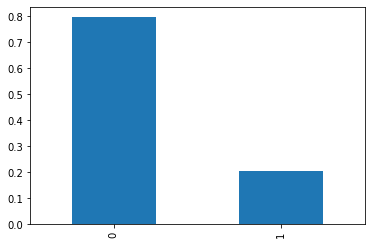

In [129]:
# проверка адекватности модели
# подсчет классов в целевом признаке
class_frequency = data['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [130]:
# создаем константную модель
target=data['exited']
target_pred_constant = pd.Series(0, index=target.index)
print(accuracy_score(target, target_pred_constant)) 

0.7962796279627963


***Accuracy одинаковы и что с этим делать?
Долю правильных ответов, близкую к 100%, мы получили. А вот понимания, уйдет ли наш клиент из банка — нет. В нашей задаче наблюдается дисбаланс классов, что плохо сказывается на обучении модели.***

## Борьба с дисбалансом

Справиться с дисбалансом и более точно классифицировать ответы поможет матрица ошибок.

В нашей задаче:
истинно положительный ответ (TP)— это количество клиентов, которые:
- по прогнозу модели ушли с банка(1)
- фактически ушли из банка(1)

истинно отрицательный ответ (TN) — это количество застрахованных, которые:
- по прогнозу модели не ушли из банка(0)
- фактически не ушли из банка(0)

ложноположительный ответ (FP) — это количество застрахованных, которые:
- по прогнозу модели ушли из банка(1);
- фактически не ушли(0)

ложноотрицательный ответ (FN)— это количество застрахованных, которые:
- по прогнозу модели не ушли(0);
- фактически ушли(1)


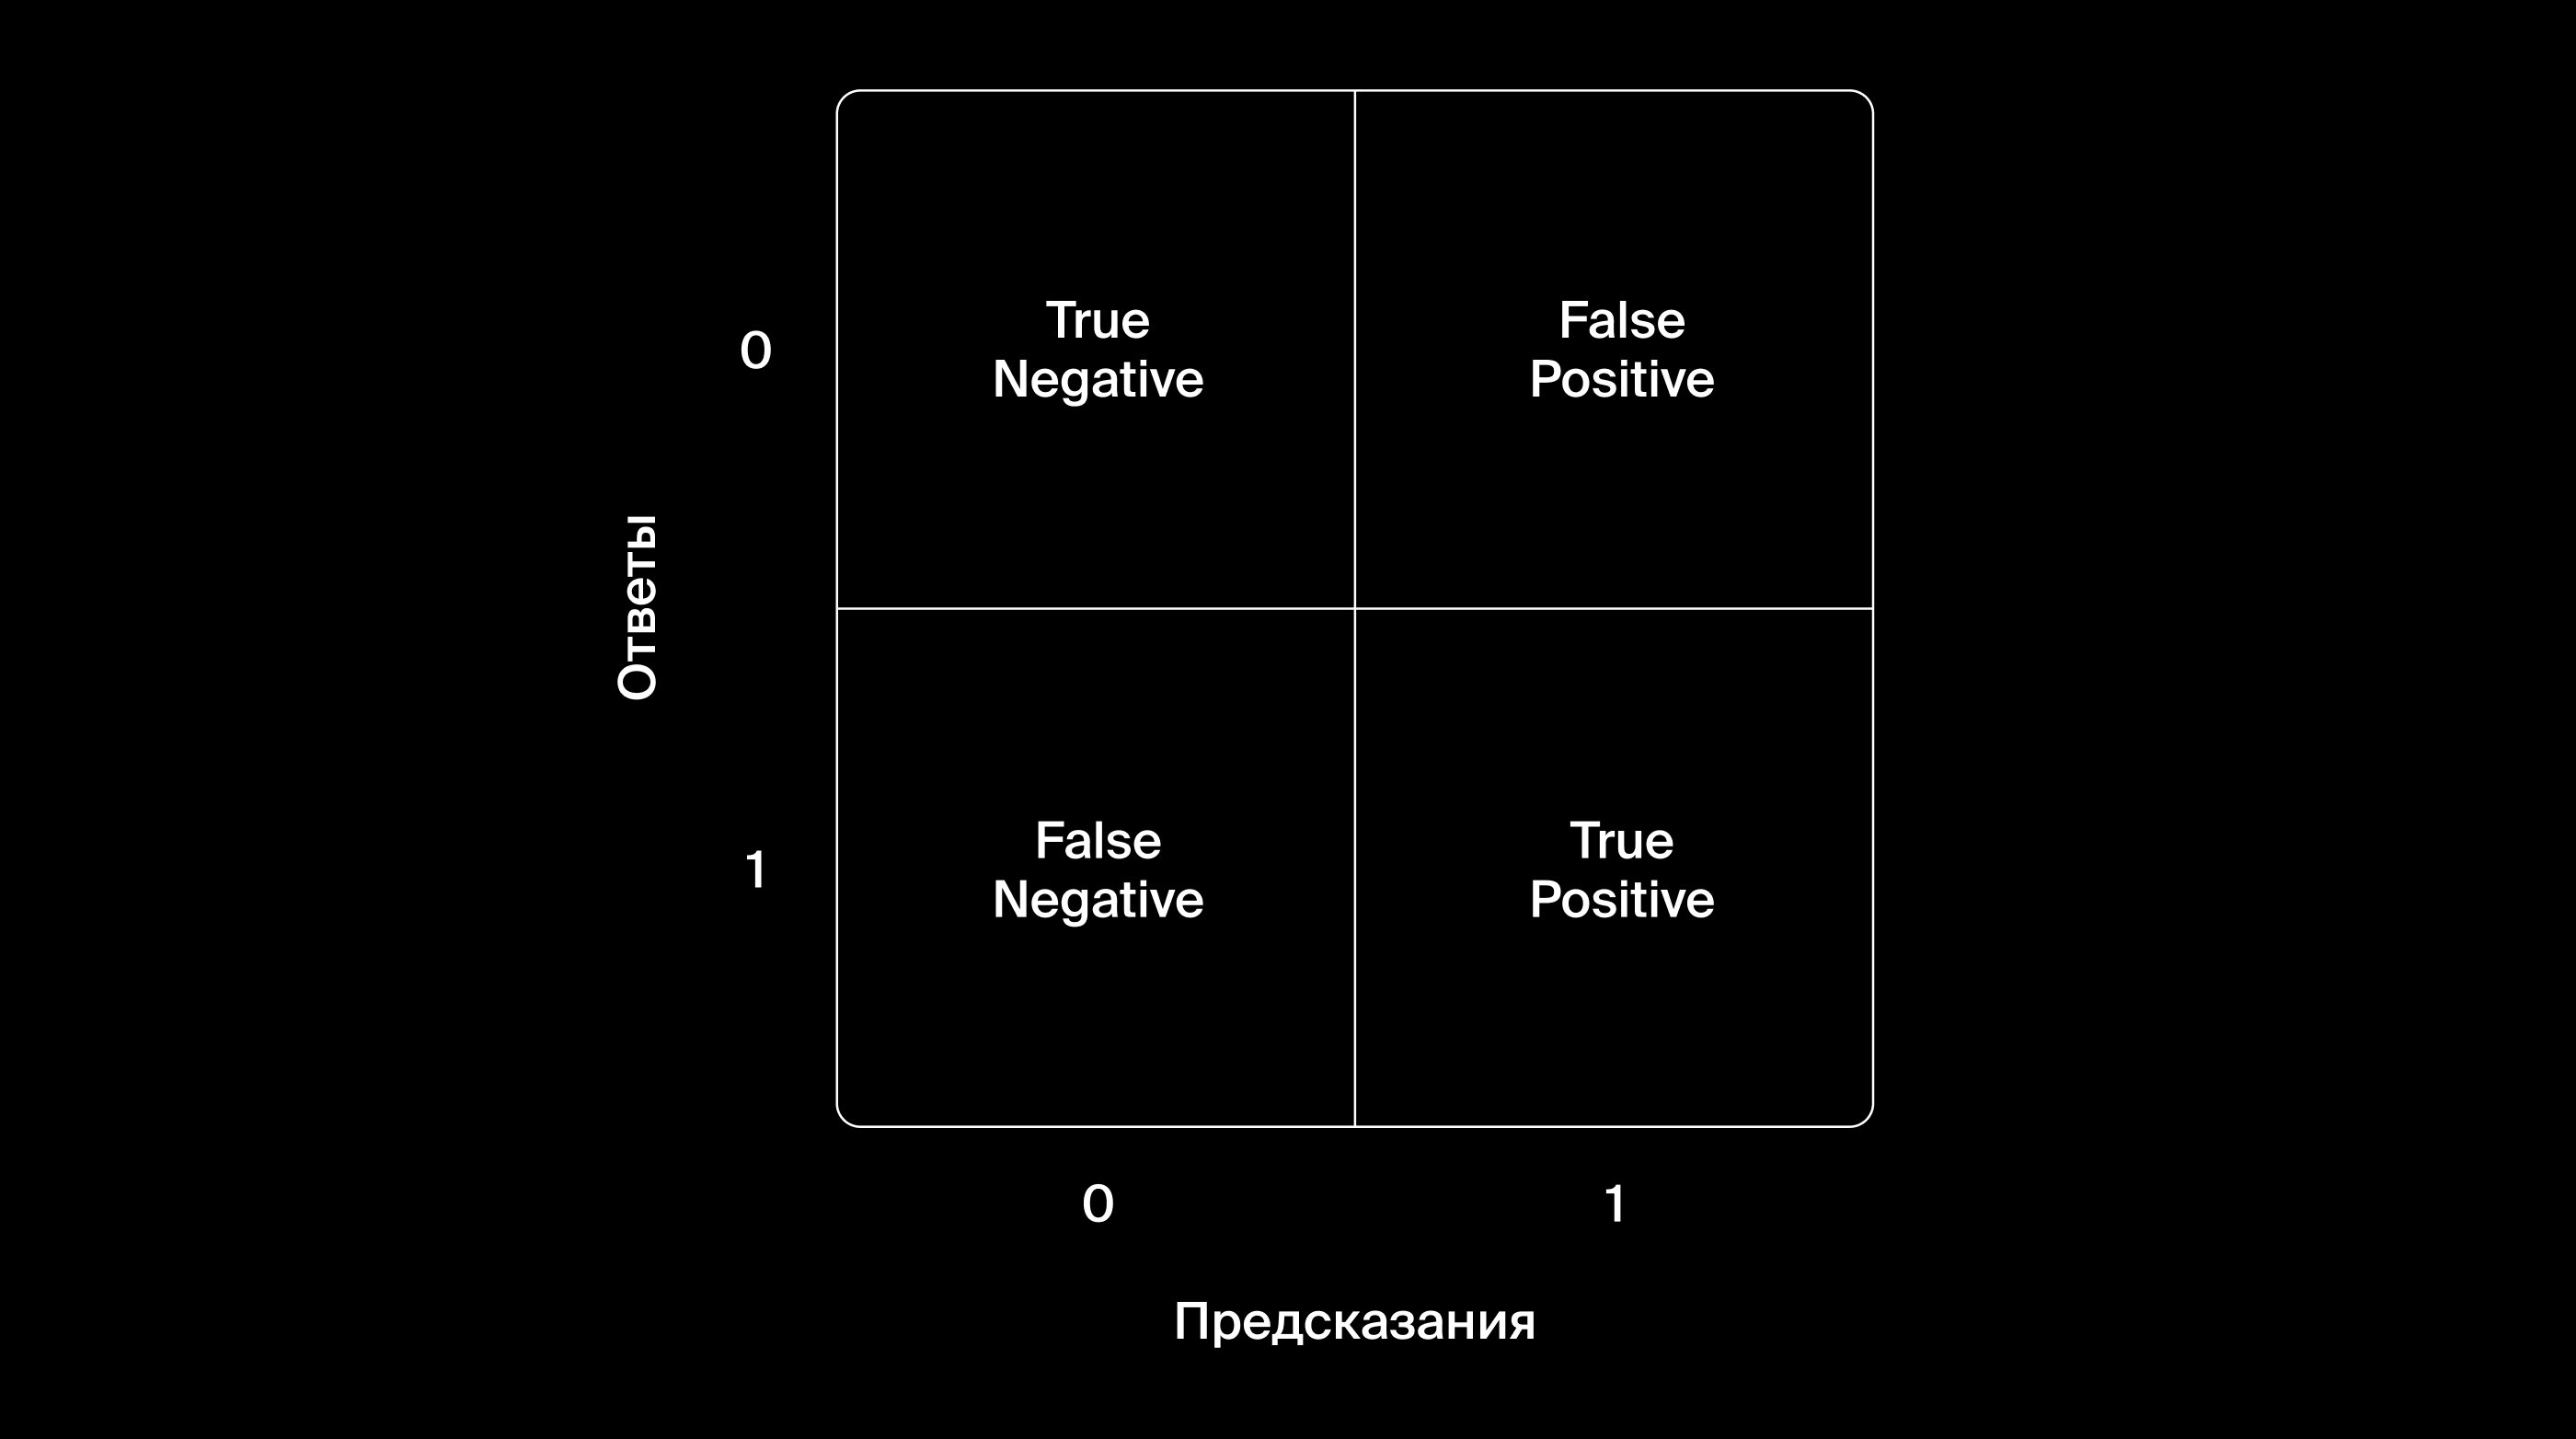

`Построем матрицу ошибок для решающего дерева, рассчитаем метрики полноты и точности, найдем среднее гармоническое полноты и точности - F1-меру. Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC. Эта метрика качества изменяется от 0 до 1. Напомню себе,что AUC-ROC случайной модели равна 0.5.`

In [131]:
DTC_model = DecisionTreeClassifier(random_state=12345)
DTC_model.fit(features_train, target_train)
DTC_predicted_valid = DTC_model.predict(features_valid)
DTC_probabilities_valid = DTC_model.predict_proba(features_valid)
DTC_probabilities_one_valid = DTC_probabilities_valid[:, 1]
DTC_auc_roc=roc_auc_score(target_valid,DTC_probabilities_one_valid)

print('Метрика полноты:', recall_score(target_valid,DTC_predicted_valid))
print('Метрика точности:', precision_score(target_valid,DTC_predicted_valid))
print('F1-мера:', f1_score(target_valid,DTC_predicted_valid))
print('Значение AUC-ROC:', DTC_auc_roc)
print(confusion_matrix(target_valid,DTC_predicted_valid))


Метрика полноты: 0.5038167938931297
Метрика точности: 0.46808510638297873
F1-мера: 0.48529411764705876
Значение AUC-ROC: 0.681902174171207
[[1382  225]
 [ 195  198]]


***Дерево решений показывает,что модель с помощью полноты угадала на 58% положительных ответов. Пока полнота искала положительные ответы, точность указала на 58% отрицательных ответов. F1-мера показывает,что положительный класс прогнозируется неплохо.***

`Построем матрицу ошибок для модели случайного леса, рассчитаем метрики полноты и точности,найдем среднее гармоническое полноты и точности - F1-меру. Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC. Эта метрика качества изменяется от 0 до 1. Напомню себе,что AUC-ROC случайной модели равна 0.5.`

In [132]:
RFC_model = RandomForestClassifier(n_estimators=50, random_state=12345)
RFC_model.fit(features_train, target_train)
RFC_predicted_valid = RFC_model.predict(features_valid)
RFC_probabilities_valid = RFC_model.predict_proba(features_valid)
RFC_probabilities_one_valid = RFC_probabilities_valid[:, 1]
RFC_auc_roc=roc_auc_score(target_valid,RFC_probabilities_one_valid)

print('Метрика полноты:', recall_score(target_valid,RFC_predicted_valid))
print('Метрика точности:', precision_score(target_valid,RFC_predicted_valid))
print('F1-мера:', f1_score(target_valid,RFC_predicted_valid))
print('Значение AUC-ROC:', RFC_auc_roc)
print(confusion_matrix(target_valid,RFC_predicted_valid))

Метрика полноты: 0.46564885496183206
Метрика точности: 0.732
F1-мера: 0.5692068429237946
Значение AUC-ROC: 0.8474279986889421
[[1540   67]
 [ 210  183]]


***Случайный лес показывает,что модель с помощью полноты угадала на 54% положительных ответов, а точность указала на аж 83% отрицательных ответов.Значение F1-меры показывает,что положительный класс прогнозируется лучше,чем модель дерева решений.***

`Построем матрицу ошибок для логистической модели, рассчитаем метрики полноты и точности, найдем среднее гармоническое полноты и точности - F1-меру. Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC. Эта метрика качества изменяется от 0 до 1. Напомню себе,что AUC-ROC случайной модели равна 0.5.`

In [133]:
LR_model = LogisticRegression(solver = 'liblinear')
LR_model.fit(features_train, target_train)
LR_predicted_valid = LR_model.predict(features_valid)
LR_probabilities_valid = LR_model.predict_proba(features_valid)
LR_probabilities_one_valid = LR_probabilities_valid[:, 1]
LR_auc_roc=roc_auc_score(target_valid, LR_probabilities_one_valid)


print('Метрика полноты:', recall_score(target_valid,LR_predicted_valid))
print('Метрика точности:', precision_score(target_valid,LR_predicted_valid))
print('F1-мера:', f1_score(target_valid,LR_predicted_valid))
print('Значение AUC-ROC:', LR_auc_roc)
print(confusion_matrix(target_valid,LR_predicted_valid))

Метрика полноты: 0.22391857506361323
Метрика точности: 0.5365853658536586
F1-мера: 0.31597845601436264
Значение AUC-ROC: 0.7585753169577755
[[1531   76]
 [ 305   88]]


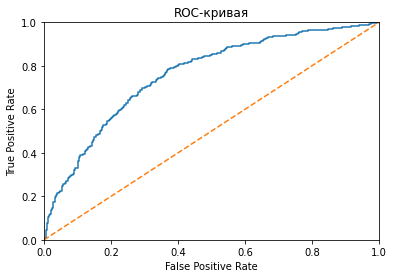

In [134]:
# построем ROC-кривую для логистической регрессии
fpr, tpr, thresholds = roc_curve(target_valid, LR_probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
# ROC-кривая случайной модели (как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0]) # < примените функции plt.xlim() и plt.ylim(), чтобы
plt.ylim([0.0, 1.0]) #   установить границы осей от 0 до 1 >
plt.xlabel('False Positive Rate') # < примените функции plt.xlabel() и plt.ylabel(), чтобы
plt.ylabel('True Positive Rate') #   подписать оси "False Positive Rate" и "True Positive Rate" >
plt.title('ROC-кривая') # < добавьте к графику заголовок "ROC-кривая" функцией plt.title() >
plt.show() 

***Значение метрики полноты в данной модели всего 20%. Точность указала на 57% отриц.ответов. Однозначно, отрицательных ответов много и нужно что-то делать:либо их уменьшать,либо увеличивать положительные***

`Сделаем вес классов сбалансированными. Посмотрим, как изменится значение F1-меры`

In [135]:
#логистической модели
LR_model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
LR_model.fit(features_train, target_train)
LR_predicted_valid = LR_model.predict(features_valid)
LR_probabilities_valid = LR_model.predict_proba(features_valid)
LR_probabilities_one_valid = LR_probabilities_valid[:, 1]
LR_auc_roc=roc_auc_score(target_valid, LR_probabilities_one_valid)


print('Метрика полноты:', recall_score(target_valid,LR_predicted_valid))
print('Метрика точности:', precision_score(target_valid,LR_predicted_valid))
print('F1-мера:', f1_score(target_valid,LR_predicted_valid))
print('Значение AUC-ROC:', LR_auc_roc)
print(confusion_matrix(target_valid,LR_predicted_valid))

Метрика полноты: 0.7073791348600509
Метрика точности: 0.37066666666666664
F1-мера: 0.48643919510061234
Значение AUC-ROC: 0.7622250617923176
[[1135  472]
 [ 115  278]]


In [136]:
#случайного леса
RFC_model = RandomForestClassifier(n_estimators=50, random_state=12345, class_weight='balanced')
RFC_model.fit(features_train, target_train)
RFC_predicted_valid = RFC_model.predict(features_valid)
RFC_probabilities_valid = RFC_model.predict_proba(features_valid)
RFC_probabilities_one_valid = RFC_probabilities_valid[:, 1]
RFC_auc_roc=roc_auc_score(target_valid, RFC_probabilities_one_valid)


print('Метрика полноты:', recall_score(target_valid, RFC_predicted_valid))
print('Метрика точности:', precision_score(target_valid, RFC_predicted_valid))
print('F1-мера:', f1_score(target_valid, RFC_predicted_valid))
print('Значение AUC-ROC:', RFC_auc_roc)
print(confusion_matrix(target_valid, RFC_predicted_valid))

Метрика полноты: 0.43256997455470736
Метрика точности: 0.748898678414097
F1-мера: 0.5483870967741935
Значение AUC-ROC: 0.8513524640131993
[[1550   57]
 [ 223  170]]


In [137]:
# дерево решений
DTC_model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
DTC_model.fit(features_train, target_train)
DTC_predicted_valid = DTC_model.predict(features_valid)
DTC_probabilities_valid = DTC_model.predict_proba(features_valid)
DTC_probabilities_one_valid = DTC_probabilities_valid[:, 1]
DTC_auc_roc=roc_auc_score(target_valid, DTC_probabilities_one_valid)


print('Метрика полноты:', recall_score(target_valid, DTC_predicted_valid))
print('Метрика точности:', precision_score(target_valid, DTC_predicted_valid))
print('F1-мера:', f1_score(target_valid, DTC_predicted_valid))
print('Значение AUC-ROC:', DTC_auc_roc)
print(confusion_matrix(target_valid, DTC_predicted_valid))

Метрика полноты: 0.48091603053435117
Метрика точности: 0.4543269230769231
F1-мера: 0.4672435105067985
Значение AUC-ROC: 0.6698295149560368
[[1380  227]
 [ 204  189]]


***Итак, F1-мера в модели решающего дерева уменьшилась с 0.49 до 0.46, а значение AUC-ROC увеличилось незначительно с 0.67 до 0.68. В модели случайного леса F1-мера уменьшилась с 0.56 до 0.54, значение AUC-ROC приблизительно осталось тем же 0.85.
А в логистической модели значение F1-мера увеличилась с 0.31 до 0.48, значение AUC-ROC осталось почти тем же 0.76.
Но возможно, это хорошо. Чтобы увеличить качество модели при дисбалансе классов, попробуем увеличение и уменьшение выборки.***

***Увеличение выборки.
Преобразование проходит в несколько этапов:***
- Разделить обучающую выборку на отрицательные и положительные объекты;
- Скопировать несколько раз положительные объекты;
- С учётом полученных данных создать новую обучающую выборку;
- Перемешать данные.

In [138]:
# разделим обучающую выборку на отрицательные и положительные объекты
features_zeros=features_train[target_train == 0] # признаки объектов с ответом «0»;
features_ones=features_train[target_train == 1] #признаки объектов с ответом «1»;
target_zeros=target_train[target_train == 0] # целевой признак объектов, у которых ответы только «0»;
target_ones=target_train[target_train == 1] # целевой признак объектов, у которых ответы только «1».

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4787, 11)
(1212, 11)
(4787,)
(1212,)


In [139]:
# так как у нас положит. и отриц. ответы приблизительно разделились на 20% и 80%
# скопируем 4 раз положительные объекты
repeat = 4
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros]+[target_ones]*repeat)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9635, 11)
(9635,)


In [140]:
# перемешаем данные
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    return shuffle(features_upsampled,target_upsampled, random_state=12345)
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

repeat = 4
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    


features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9635, 11)
(9635,)


In [152]:
LR_model = LogisticRegression(random_state=12345,solver='liblinear', class_weight='balanced')
LR_model.fit(features_upsampled, target_upsampled)
LR_predicted_valid = LR_model.predict(features_valid)
LR_score = LR_model.score(features_valid, target_valid)
print("При LR_model F1-мера=", f1_score(target_valid, LR_predicted_valid))

RFC_model = RandomForestClassifier(n_estimators=50, random_state=12345,class_weight='balanced')
RFC_model.fit(features_upsampled, target_upsampled)
RFC_predicted_valid = RFC_model.predict(features_valid)
RFC_score = RFC_model.score(features_valid, target_valid)
print("При RFC_model F1-мера=", f1_score(target_valid, RFC_predicted_valid))

DTC_model = DecisionTreeClassifier(random_state=12345,class_weight='balanced')
DTC_model.fit(features_upsampled, target_upsampled)
DTC_predicted_valid = DTC_model.predict(features_valid)
DTC_score = DTC_model.score(features_valid, target_valid)
print("При DTC_model F1-мера=", f1_score(target_valid, DTC_predicted_valid))

При LR_model F1-мера= 0.4877622377622377
При RFC_model F1-мера= 0.5989010989010989
При DTC_model F1-мера= 0.4643734643734644


In [150]:
best_model = None
best_result = 0
maximum_depth = 0
maximum_est = 0
for est in range(1, 10):
    for depth in range(10, 70,10):
        RFC_model = RandomForestClassifier(random_state=12345, n_estimators=est,max_depth = depth) # обучите модель с заданным количеством деревьев
        RFC_model.fit(features_upsampled, target_upsampled) # обучите модель на обуч. выборке 
        RFC_predicted_valid = RFC_model.predict(features_valid) # проверим модель на валид.наборе
        RFC_result = f1_score(target_valid, RFC_predicted_valid) # посчитаем качество модели
        if RFC_result>best_result:
            best_model = RFC_model
            best_result = RFC_result
            maximum_depth = depth
            maximum_est = est
print('При максимальной глубине =',maximum_depth, 'и количестве деревьев',maximum_est, '- accuracy наилучшей модели на валидационной выборке:', best_result)

При максимальной глубине = 10 и количестве деревьев 7 - accuracy наилучшей модели на валидационной выборке: 0.6024915062287656


***Уменьшение выборки.
Преобразование проходит в несколько этапов:***
- Разделить обучающую выборку на отрицательные и положительные объекты;
- Случайным образом отбросить часть из отрицательных объектов;
- С учётом полученных данных создать новую обучающую выборку;
- Перемешать данные. Положительные не должны идти следом за отрицательными: алгоритмам будет сложнее обучаться.

In [153]:
# разделим выборку и отбросим часть
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
  
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, fraction = 0.25) #0.4

# обучим наши модели и глянем на F1-меру
LR_model = LogisticRegression(random_state=12345,solver='liblinear',class_weight='balanced')
LR_model.fit(features_downsampled, target_downsampled)
LR_predicted_valid = LR_model.predict(features_valid)
LR_score = LR_model.score(features_valid, target_valid)
print("При LR_model F1-мера=", f1_score(target_valid, LR_predicted_valid))

RFC_model = RandomForestClassifier(n_estimators=50, random_state=12345,class_weight='balanced')
RFC_model.fit(features_downsampled, target_downsampled)
RFC_predicted_valid = RFC_model.predict(features_valid)
RFC_score = RFC_model.score(features_valid, target_valid)
print("При RFC_model F1-мера=", f1_score(target_valid, RFC_predicted_valid))

DTC_model = DecisionTreeClassifier(random_state=12345,class_weight='balanced')
DTC_model.fit(features_downsampled, target_downsampled)
DTC_predicted_valid = DTC_model.predict(features_valid)
DTC_score = DTC_model.score(features_valid, target_valid)
print("При DTC_model F1-мера=", f1_score(target_valid, DTC_predicted_valid))

При LR_model F1-мера= 0.49116607773851584
При RFC_model F1-мера= 0.5756385068762279
При DTC_model F1-мера= 0.47048458149779737


***Из всех значений F1-мера у модели случайного леса (при увеличении выборки) показатель ≈ 0.68 лучше всех классифицирует каждое наблюдение в правильный класс. Значит, при тестировании воспользуемся именно этой моделью.***

Напомним, что оценки F1 могут варьироваться от 0 до 1, где 1 представляет модель, которая идеально классифицирует каждое наблюдение в правильный класс, а 0 представляет модель, которая не может классифицировать какое-либо наблюдение в правильный класс.

## Тестирование модели

In [143]:
# обучение модели случайного леса на тестовых данных
test_RFC_model = RandomForestClassifier(max_depth=10, n_estimators=50, min_samples_leaf=1, random_state=12345, class_weight = 'balanced')
test_RFC_model.fit(features_upsampled, target_upsampled)
test_RFC_model_prediction = test_RFC_model.predict(features_test)
test_RFC_probabilities = test_RFC_model.predict_proba(features_test)
test_RFC_probabilities_one = test_RFC_probabilities[:, 1]
test_RFC_auc_roc=roc_auc_score(target_test,test_RFC_probabilities_one)

print('Метрика полноты:', recall_score(target_test,test_RFC_model_prediction))
print('Метрика точности:', precision_score(target_test,test_RFC_model_prediction))
print('F1-мера:', f1_score(target_test,test_RFC_model_prediction))
print('Значение AUC-ROC:', test_RFC_auc_roc)


Метрика полноты: 0.6550925925925926
Метрика точности: 0.5847107438016529
F1-мера: 0.6179039301310043
Значение AUC-ROC: 0.8430753377739983


***Тест показал вполне высокие значения метрик. Но хотелось бы еще проверить отличается ли оценка правильности accuracy на обучающей и тестовой выборках.***

In [144]:
print("Accuracy")
print("Обучающая выборка:", accuracy_score(target_valid, RFC_predicted_valid))
print("Тестовая выборка:", accuracy_score(target_test, test_RFC_model_prediction))

Accuracy
Обучающая выборка: 0.787
Тестовая выборка: 0.825


***Итак, тестовая выборка показала результат лучше,поэтому можно считать,что наша модель работает адекватно***

### Вывод:

***В начале работы при определении оценки на адекватность модели мы видели, что показатель accuracy не отличался Наблюдался дисбаланс классов. Это плохо сказывалось на обучении модели. Мы построили матрицы ошибок, рассчитали метрики полноты, точности, F1-меры и нашли значения AUC-ROC. На основе получивших данных увидели,что отрицательных ответов оказалось больше почти в 4 раза. Чтобы увеличить качество оценки модели, было решено провести увчеличение выборки и уменьшение выборки. В результате данных действий нашли самую оптимальную модель (модель случайного леса) для дальнейшей работы с тестами. При тестировании модели случайного леса показатели оценки на адекватность при тестовой выборке показали себя с лучшей стороны и оказались выше показателей обучающей выборки.***
